In [1]:
# для начала импортируем модули, которые понадобятся нам для написание классификатора 
# numpy - библиотека для работы с массивами(матрицами в том числе), помогает делать различные операции над ними
import numpy as np
# matplotlib, seaborn понадобятся для рисования графиков, отображения изображений
from matplotlib import pyplot as plt
import seaborn as sns

# с помощью этой команды графики будут отображаться в текущем окне в ноутбуке под ячейкой, где написан код для отображения графика 
%matplotlib inline

# Зафиксируем случайность, чтобы каждый раз получалось одно и тоже
np.random.seed(seed=42)

Сгененируем точки для трех классов, у каждого класса 50 точек, каждая из которых имеет 2 координаты.

Будем для этого использовать np.random.normal и добавим еще одну

Добавим еще точку point, позже определим ее класс

Первый класс имеет синий цвет на графике, второй - оранжевый, третий - зелёный.

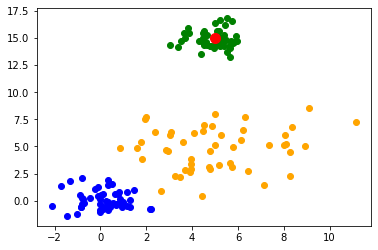

In [44]:
p1 = np.random.normal(loc=0, scale=1, size=(50,2))
p2 = np.random.normal(loc=5, scale=2, size=(50,2))
p3 = np.random.normal(loc=10, scale=0.8, size=(50,2)) - np.array([5, -5])


X = np.concatenate((p1, p2, p3))
y = np.array([1]*50 + [2]*50 + [3]*50)

point = [5,15]

plt.scatter(p1[:,0], p1[:, 1], color='blue')
plt.scatter(p2[:,0], p2[:, 1], color='orange')
plt.scatter(p3[:,0], p3[:, 1], color='green')
plt.scatter(point[0], point[1], s = 100, color='red')

Реализуем kNN самостоятельно. Нам будет достаточно написать функцию вычисления результирующего класса.

In [2]:
def euclidian_metric(a, b):  # реализуем Евклидову метрику через норму
     #############
     #  ВАШ КОД  #
     #############
        
    return np.sqrt(np.sum(np.power(a-b,2),1))

In [4]:
# запустим эту ячейку, чтобы проверить, всё ли верно реализовано на текущем этапе
# если возникает ошибка в assert, то при реализации функций была допущена ошибка
# если появляется текст из print - на данном этапе ошибок нет
a = np.zeros((1,4))
b = np.ones((1,4))

assert euclidian_metric(a,b)[0] == 2
print('ошибок нет')

ошибок нет


In [5]:
# Пример, показывающий разницу между axis
array = [[1,2,3],[1,2,3],[1,2,3]]
print('Сумма при axis = 0: {0}'.format(np.sum(array, axis = 0)))
print('Сумма при axis = 1: {0}'.format(np.sum(array, axis = 1)))

Сумма при axis = 0: [3 6 9]
Сумма при axis = 1: [6 6 6]


Далее реализуем функции, необходимые нам для вычисления класса по методу ближайших соседей.
Напишите функцию, которая по уже рассчитанным расстояниям от точек y до нашей точки (distances) находит и возвращает k ближайших соседей и соответствующие расстояния до них.

In [6]:
def find_neighbours(k, y, distances):
    #############
    #  ВАШ КОД  #
    #############
    distance = np.sort(distances)
    neighbours = y[np.argsort(distances)][:k]
    neighbours_distances = distance[:k]
    return neighbours, neighbours_distances


In [7]:
Y = np.arange(10)
dist = np.linspace(1, 10, 10)
neighbours = find_neighbours(3, Y, dist)  
real_neighbours = ([0, 1, 2], [1., 2., 3.])
for i in range(len(neighbours)):
    for j in range(len(neighbours[i])):
        assert neighbours[i][j] == real_neighbours[i][j]
print('Если вы видите этот текст, но не видите ошибку, то всё работает корректно!')

Если вы видите этот текст, но не видите ошибку, то всё работает корректно!


Реализуйте функцию, выделяющую преобладающий класс среди соседних объектов. Если есть конкурирующие классы, то нужно вернуть их все.

Конкурирующими считаются те классы, для которых количество принадлежащих им объектов равно между собой и при этом наибольшее среди всех классов, представленных в подвыборке.

In [8]:
def get_closest_classes(neighbours):
    #############
    #  ВАШ КОД  #
    #############
    clas_ind,max_val = np.unique(neighbours,return_counts=True)[0],np.unique(neighbours,return_counts=True)[1]
    best_classes = clas_ind[max_val==max(max_val)]
    return best_classes

In [9]:
# sanity check
assert get_closest_classes(np.asarray([1,2,3,2,2])) == [2]
closest = get_closest_classes(np.asarray([1,2,3,2,3]))
assert closest[0] == 2 and closest[1] == 3
print('get_closest_classes работает верно')

get_closest_classes работает верно


Напишите функцию, которая выбирает наиболее подходящий класс, при условии, что есть несколько конкурирующих классов.

Для этого будет необходимо посчитать среднее расстояние до объектов каждого класса и выбрать класс с наименьшим таким расстоянием.

In [10]:
def choose_best_class(best_classes, neighbours, neighbouring_distances):
    min_mean_dist = np.inf
    best_class = None
    
    for i in range(1,max(neighbours)+1):
        mean_dist = np.mean(neighbouring_distances[neighbours==i])
        if min_mean_dist>mean_dist:
            min_mean_dist = mean_dist
            best_class = i
    #############
    #  ВАШ КОД  #
    #############
    
    return best_class

In [11]:
 #sanity check
assert choose_best_class([1,2], np.array([1, 2, 1, 3, 2]), np.asarray([0.5, 1, 1, 8, 0.6])) == 1
print('Проверка пройдена')

Проверка пройдена


Далее нужно реализовать функцию, делающую предсказание для одной точки, используя реализованные ранее функции.

In [12]:
# эта функция будет считать расстояния каждой точки элемента выборки x_pred до всех точек 
# в исходном датасете X и на основе расстояний вычислять принадлежность к классу

def nearest_neighbours_classify(x, y, k, x_pred):
    res = np.zeros(x_pred.shape[0], dtype=y.dtype)

    for i in range(x_pred.shape[0]):
        distances = euclidian_metric(x, x_pred[i])  # считаем расстояния до классов

        neighbours, neighbouring_distances = find_neighbours(k, y, distances)  # находим ровно k соседей этой точки
            
        best_classes = get_closest_classes(neighbours)  # обнаруживаем классы, которые имеются среди соседей

        res[i] = choose_best_class(best_classes, neighbours, neighbouring_distances)  # выбираем наиболее релевантный класс по среднему расстоянию до него среди соседей
    return res

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# train_test_split разбивает X и y на выборки при этом размер тестовой выборки устанавливается через test_size  
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)

# выберем число соседей =  5
# для данных из тестовой выборки предскажем, к какому классу относятся точки
y_pred = nearest_neighbours_classify(X_train, y_train, 5, X_test)

#а теперь сравним предсказанное значение с реальным и выведем значение, показывающее процент верно классифицированных
#(значение будет от 0 до 1 - от 0 до 100 процентов соответственно)
print(accuracy_score(y_test, y_pred))

1.0


In [46]:
point = np.array(point) # изначально точка добавлялась на график как список, но мы работает с numpy массивами
nearest_neighbours_classify(X_train, y_train, 5, point)[0]

C:\python\__pycache__\envs\dsfs\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\python\__pycache__\envs\dsfs\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2

Посмотрим, как работает KNN на рукописных цифрах, будем определять цифру по картинке 8х8

В этом случае используются уже не два значения, как это было для точки, а 64 (см. размер картинки). Каждое отвечает за значение цвета в пикселе, его цвет может быть от белого до черного. У одинаковых цифр будут близкие значения в каждой координате массива 8х8

In [48]:
from sklearn import datasets

# загружаем датасет с цифрами
# В Х загрузим картинки с цифрами, по Х предсказываем класс
# В y хранится значение целевого признака, что мы должны предсказать в итоге. 
X, y = datasets.load_digits(return_X_y=True)

print("Экземпляров: {}\nРазмер изображения: {}x{}".format(X.shape[0], np.sqrt(X.shape[1]), np.sqrt(X.shape[1])))

Экземпляров: 1797
Размер изображения: 8.0x8.0


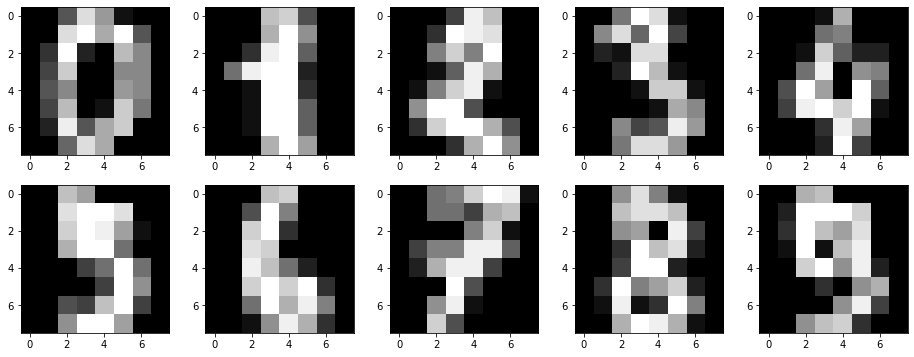

In [49]:
# выведем пример содержимого датасета с помощью кода ниже(10 цифр)
# Для начала зафиксируем размер итоговой фигуры(на нее будем добавлять изображения с цифрами)
plt.figure(figsize=(16, 6))
width = int(np.sqrt(X.shape[1]))
# Затем в цикле будем добавлять изображения на фигуру, используя функцию subplot, 
# она нужна для добавления независимых графиков\изображений на одной ячейке
# первое значение в subplot обозначает число строк, второе - число столбцов,
# то есть так можно добавить на график 5 в каждую строку, всего 2 строки
# Третье значение отвечает за текущую позицию(нумерация с 1), например, если позиция 6, то картинка добавится в первый столбец второго ряда(для текущих значений) 
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([width,width]), cmap='gray')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

y_pred = nearest_neighbours_classify(X_train, y_train, 5, X_test)

print(accuracy_score(y_test, y_pred))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'